# Step1， 分别生成2层，3层，6层的友好地图

[ 0 24 57]


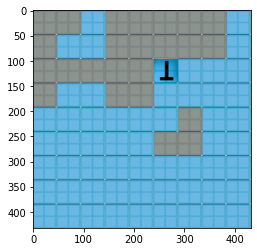

In [1]:
import fastwfc
import matplotlib.pyplot as plt
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data, get_all_pair_shortest_path, get_connectity_dict
from utils import tilemap2heightmap
import numpy as np
import random
# from graph_analysis import DiGraphStats
wfc = fastwfc.XLandWFC("samples.xml")
base_wave = wfc.build_a_open_area_wave()
ids, img1 = wfc.mutate(base_wave=base_wave, new_weight=162, iter_count=1, out_img=True)
q = tilemap2heightmap(ids)
img2 = None
base_wave = wfc.wave_from_id(ids)
while len(np.bincount(q)) !=3:
    ids, img2 = wfc.mutate(base_wave=base_wave, new_weight=162, iter_count=1, out_img=True)
    q = tilemap2heightmap(ids)
    base_wave = wfc.wave_from_id(ids)
print(np.bincount(q))
plt.imshow(img2)
plt.pause(0.01)

In [12]:
w = np.array(ids).reshape(2,9,9)
w[0]+1

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 5,  1, 26,  4,  6,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 5,  1,  5,  1,  5,  1, 25,  2,  4]])

In [50]:
def tilemap2heightmap(map_ids):
    map_data = tiles2data(map_ids)
    _, height_dict= get_connectity_dict(out_height_dict=True)
    id_to_height = {}
    for height, ids in height_dict.items():
        for id in ids:
            id_to_height[id] = height
    all_height_map = []
    for tile in map_data:
        tile_height = id_to_height[tile]
        all_height_map.append(tile_height)
    np_all_height_map = np.array(all_height_map)
    return np_all_height_map

In [20]:
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
unity_env = WFCUnity3DEnv()
unity_env.set_wave(ids)
unity_env.render_in_unity()

Trying to connect to 0.0.0.0:30051
reset world and agent


array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 6, 1, 1, 1, 1, 1],
       [2, 2, 2, 1, 1, 1, 1, 1, 1],
       [1, 1, 2, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]])

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 1, 1, 1, 1],
       [5, 6, 6, 1, 1, 1, 1, 1, 1],
       [5, 5, 5, 5, 4, 2, 1, 2, 2],
       [5, 5, 5, 2, 2, 2, 2, 2, 2],
       [1, 1, 6, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2]])

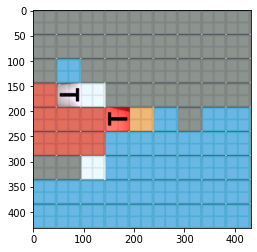

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 1, 1, 1, 1],
       [5, 6, 6, 1, 1, 1, 1, 1, 1],
       [5, 5, 5, 5, 4, 2, 1, 2, 2],
       [5, 5, 5, 2, 2, 2, 2, 2, 2],
       [1, 1, 6, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [53]:
plt.imshow(img2)
plt.pause(0.01)
tilemap2heightmap(ids).reshape(9,9)
# wave2heightmap(wave).reshape(9,9)

In [17]:
print(tilemap2heightmap(ids))
print(ids)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 2, 84: 2, 85: 2, 86: 2, 87: 2, 24: 2, 25: 2, 26: 2, 27: 2, 8: 3, 9: 3, 10: 3, 11: 3, 44: 3, 45: 3, 46: 3, 47: 3, 88: 3, 89: 3, 90: 3, 91: 3, 28: 3, 29: 3, 30: 3, 31: 3, 12: 4, 13: 4, 14: 4, 15: 4, 32: 4, 33: 4, 34: 4, 35: 4, 48: 4, 49: 4, 50: 4, 51: 4, 60: 4, 61: 4, 62: 4, 63: 4, 92: 4, 93: 4, 94: 4, 95: 4, 16: 5, 17: 5, 18: 5, 19: 5, 36: 5, 37: 5, 38: 5, 39: 5, 52: 5, 53: 5, 54: 5, 55: 5, 64: 5, 65: 5, 66: 5, 67: 5, 72: 5, 73: 5, 74: 5, 75: 5, 96: 5, 97: 5, 98: 5, 99: 5, 20: 6, 21: 6, 22: 6, 23: 6, 40: 6, 41: 6, 42: 6, 43: 6, 56: 6, 57: 6, 58: 6, 59: 6, 68: 6, 69: 6, 70: 6, 71: 6, 76: 6, 77: 6, 78: 6, 79: 6, 80: 6, 81: 6, 82: 6, 83: 6, 100: 6, 101: 6, 102: 6, 103: 6}
[1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1]
[(0, 0), (2, 0), (5, 0), (5, 0), (5, 0), (5, 0), (2, 0), (1, 0), (0, 0), (5, 0), (5, 0), (5, 0), (5, 0), (5, 0)

In [11]:
import numpy as np
def get_no_path_pair_rate(ids):
    DG = map2digraph(tiles2data(ids))
    all_pair_shortest_path, all_pair_shortest_path_dict = get_all_pair_shortest_path(DG, return_dict=True)
    all_pair_length = []
    for pair in all_pair_shortest_path:
        all_pair_length.append(len(pair))
    no_path_pair_count = 0
    for i in DG.nodes:
        for j in DG.nodes:
            if i!=j and j not in all_pair_shortest_path_dict[i].keys():
                no_path_pair_count += 1
    no_path_pair_rate = no_path_pair_count /(len(DG.nodes)**2)
    return no_path_pair_rate, np.mean(all_pair_length)

In [12]:
rate,_ = get_no_path_pair_rate(ids)
target_rate = 0
min_rate = 1000
iter_count = 100
count = 0
base_wave = wave
while count < iter_count:
    count+=1
    new_ids, _ = wfc.mutate(base_wave=base_wave,new_weight=80,iter_count=1,out_img=False)
    new_rate, _ = get_no_path_pair_rate(new_ids)
    if new_rate < min_rate:
        min_rate = new_rate
        min_rate_ids = new_ids
        base_wave = wfc.wave_from_id(new_ids)
        print(count, min_rate)


NameError: name 'wave' is not defined

In [3]:
# new_wave = wfc.wave_from_id(min_rate_ids)
new_wave = wfc.wave_from_id(ids)
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
# unity3d_env = WFCUnity3DEnv(file_name="/Users/yinzi/Downloads/1126_mac_build_faswfc.app/Contents/MacOS/tilemap_render")
unity3d_env = WFCUnity3DEnv()
unity3d_env.set_wave(new_wave)
unity3d_env.render_in_unity()

/Users/yinzi/miniforge3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Trying to connect to 0.0.0.0:30051
reset world and agent
